
# Assignment: Linear Regression, Logistic Regression, and K-Means (From Scratch)

**Instructions**
- You are NOT allowed to use `scikit-learn` for model implementation, scaling.
- You may use it for implementation of clustering
- You may use: `numpy`, `matplotlib`, and standard Python libraries only.
- Every step (scaling, loss, gradients, optimization) must be implemented manually.
- Clearly comment your code and explain your reasoning in Markdown cells.


## Question 1: Linear Regression from Scratch (with Standardization and Regularization)

You are given a dataset `(X, y)`.

### Tasks
1. Implement **StandardScaler manually**:
   - Compute mean and standard deviation for each feature.
   - Standardize the features.
2. Implement **Linear Regression using Gradient Descent**.
3. Add **L2 Regularization (Ridge Regression)**.
4. Plot:
   - Loss vs iterations
   - True vs predicted values

Do NOT use `sklearn`.


In [4]:

import numpy as np
import matplotlib.pyplot as plt


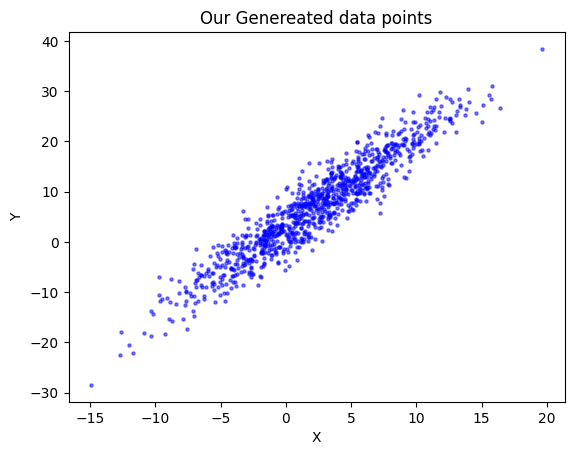

In [5]:
##First we make the data needed for the visualization of the codes wrtitten..i took help of the internet to learn how to generaete these data
## we do it by first taking points on a perfectly stragiht line like y = mx+b and then we add random noise into each of the points so they become scattered around the line
#this will help us visualize our code
X = 5*np.random.randn(1000) + 2.0 # random values for X
m = 1.75
b = 3.0
Y = m*X + b
noise = 3*np.random.randn(1000)
Y += noise
plt.scatter(X, Y,color='blue',alpha=0.5,s=5)
plt.title("Our Genereated data points")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


In [7]:
# Implement StandardScaler manually ,  first read about it, how it works and then implement it
## standardization of the plot is to normalize the datr so that it has mean =0 and the sigma i.e the variance/standarad deviation become 1
## to achieve this we calculate mu and sigma overa all the points and then make every point equal to x' : (x- mean)/(std. dev.)
class StandardScalerManual:
    def fit(self, X):
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)
        ##in case the std dev is 0 for some point we make the sigma = 1 instead or we can just add a little noise like 10^-10 to the original x value so that its sigma is not perfectly zero...also it does not effect the data and algorithm as much so just to avoid dividing by zero we may do any of the methods.
        self.std[self.std == 0] = 1

    def transform(self, X):
        output = (X - self.mean) / self.std
        return output

    def fit_transform(self, X):
        ##this is the main method in this class, we will use it and this class will utlize the other two prev classes to return the desired outuputt
        self.fit(X)
        output = self.transform(X)
        return output


In [8]:

# Implement Linear Regression from scratch, here you have to also construct the regulization term coefficient of which will be
# denoted by l2_lambda
# try to implement L1 regularization or atlease read about it and where it is used
class LinearRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []
        self.weights = None ## we an directly intitialize it later in fit method as well but for better clarity i have done it here only
        self.bias = None

    def fit(self, X, y):
        m,n = X.shape
        self.bias = 0
        self.weights = np.zeros(n)

        for ite in range(self.epochs):
          y_pred = np.dot(X,self.weights) +self.bias  ##y = x.w + b
          loss_mse = np.mean((y_pred - y)**2)/2
          ##this ids the loss for normal linear regression with gradeint descent
          ##but for l2 linearization i.e ridge regression, as learned in the class as well asthe statquest videos, we introduce a new teerm that is lambda/2*loss^2
          lambda_term = (self.l2_lambda/2) * np.sum(self.weights**2)
          loss = loss_mse + lambda_term ## this is the final loss for the ridge regression

          ##Computing gradients by differentiating
          w_ = (1/m)*np.dot(X.T,(y_pred - y)) + (self.l2_lambda*self.weights)
          b_ = (1/m)*np.sum(y_pred - y)

          ## cahnging parameteres(applying feedback) according to the gradients
          self.weights -= self.lr*w_
          self.bias -= self.lr*b_
          ##adding the loss to the loss array so that we can plot it afterwards
          self.losses.append(loss)


    def predict(self, X):
        return  np.dot(X,self.weights) + self.bias


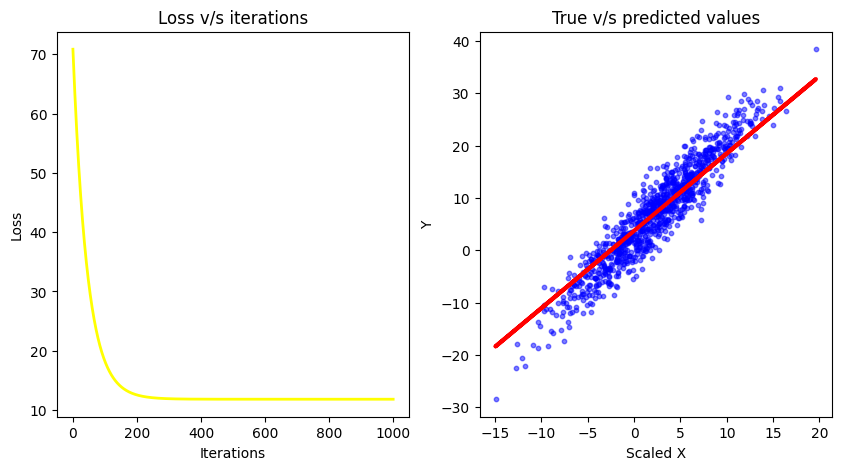

In [12]:
##now plotting loss v/s iterations
X_ = X.reshape(-1,1)
scaler = StandardScalerManual()
X_final = scaler.fit_transform(X_)

linear = LinearRegressionManual(lr=0.01,epochs=1000,l2_lambda=0.2)
linear.fit(X_final,Y)
prediction = linear.predict(X_final)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(linear.losses,color='yellow',linewidth=2)
plt.title("Loss v/s iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.scatter(X,Y,color='blue',alpha=0.5,s=10)
plt.plot(X,prediction,color='red',linewidth=3)
plt.title("True v/s predicted values")
plt.xlabel("Scaled X")
plt.ylabel("Y")
plt.show()


## Question 2: Logistic Regression from Scratch (with Standardization and Regularization)

You are given a binary classification dataset.

### Tasks
1. Reuse your **manual StandardScaler**.
2. Implement **Logistic Regression using Gradient Descent**.
3. Use:
   - Sigmoid function
   - Binary Cross Entropy loss
4. Add **L2 Regularization**.
5. Report:
   - Training loss curve
   - Final accuracy

Do NOT use `sklearn`.


Text(0, 0.5, 'Y_l')

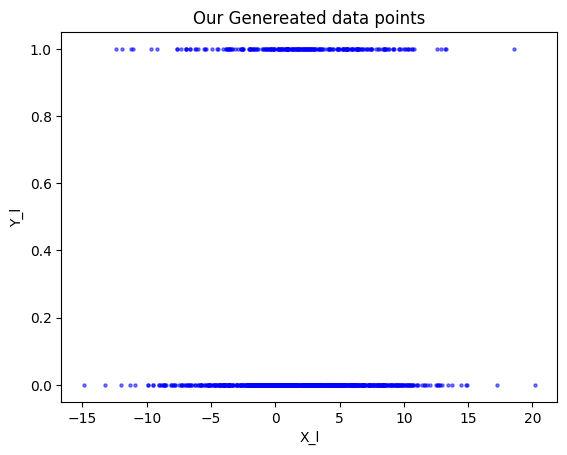

In [15]:
##generating data points for testing our logistic reression model
X_l = 5*np.random.randn(1000) + 2.0 # random values for X
m_l = 1.75
b_l = 3.0
Y_l = m_l*X_l + b_l
noise_l = 3*np.random.randn(1000)
Y_l += noise

probabi = 1/(1+np.exp(-Y_l))
Y_l[probabi>=0.5] = 1
Y_l[probabi<0.5] = 0

plt.scatter(X_l, Y_l,color='blue',alpha=0.5,s=5)
plt.title("Our Genereated data points")
plt.xlabel("X_l")
plt.ylabel("Y_l")



In [13]:

#Implement sigmoid function as told in the lectures
##we know that sigmoid function is given by: sigmpoid(z) = 1/1+e^-z
def sigmoid(z):
    z = np.clip(z,-200,200)
    output = 1/(1+np.exp(-z))
    return output


In [14]:

#Implement Logistic Regression from scratch and here also add the regularizaation term
class LogisticRegressionManual:
    def __init__(self, lr=0.01, epochs=1000, l2_lambda=0.0):
        self.lr = lr
        self.epochs = epochs
        self.l2_lambda = l2_lambda
        self.losses = []
        self.weights = None ## we can directly intitialize it later in fit method as well but for better clarity i have done it here only
        self.bias = None


    def fit(self, X, y):
        m,n = X.shape
        self.bias = 0
        self.weights = np.zeros(n)

        for ite in range(self.epochs):
          y_pred_linear = np.dot(X,self.weights) +self.bias  ##y = x.w + b
          y_pred = sigmoid(y_pred_linear)
          y_pred_clip = np.clip(y_pred,1e-7,1-1e-7)  ## aded a very little epsilon just to avoid log(0)

          loss_bce = -np.mean(y*np.log(y_pred_clip)+(1-y)*np.log(1-y_pred_clip))
          loss_l2 = loss_bce + (self.l2_lambda/2) * np.sum(self.weights**2)      ##added the lambda erro term

          ##now calculating the graadients:
          w_ = (1/m)*np.dot(X.T,(y_pred - y)) + (self.l2_lambda*self.weights)
          b_ = (1/m)*np.sum(y_pred - y)

          ##updating the parameters
          self.weights -= self.lr*w_
          self.bias -= self.lr*b_

          ##appending the loss to the loss array so that we can later plot it
          self.losses.append(loss_l2)

    def predict_proba(self, X):
        prob = sigmoid(np.dot(X,self.weights) + self.bias)
        return prob

    def predict(self, X):
        points = self.predict_proba(X)
        points[points>=0.5] = 1
        points[points<0.5] = 0
        return points


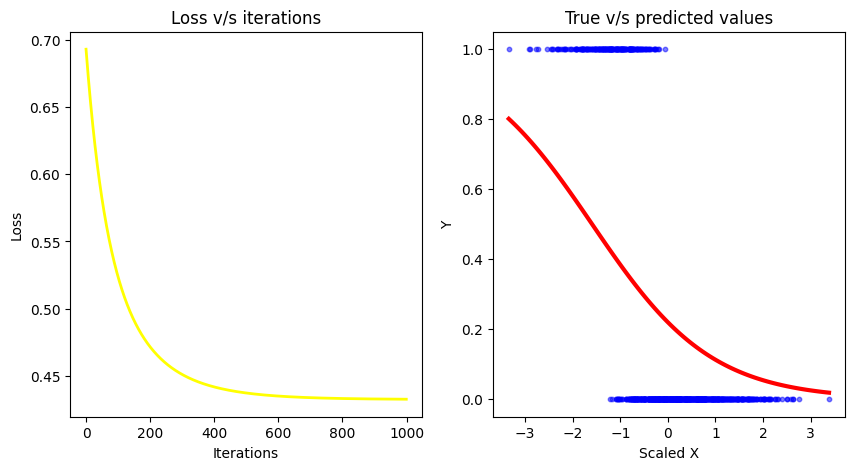

In [19]:
##testing the model
##now plotting loss v/s iterations
Xl_new = X_l.reshape(-1,1)
scaleri = StandardScalerManual()
X_finali = scaler.fit_transform(X_)

logu = LogisticRegressionManual(lr=0.02,epochs=1000,l2_lambda=0.2)
logu.fit(X_finali,Y_l)
prediction = logu.predict(X_finali)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.plot(logu.losses,color='yellow',linewidth=2)
plt.title("Loss v/s iterations")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(1,2,2)
plt.scatter(X_finali,Y_l,color='blue',alpha=0.5,s=10)
x_range = np.linspace(X_finali.min(), X_finali.max(), 100).reshape(-1, 1)
plt.plot(x_range, logu.predict_proba(x_range), color='red', linewidth=3)
plt.title("True v/s predicted values")
plt.xlabel("Scaled X")
plt.ylabel("Y")
plt.show()


## Question 3: K-Means Clustering from Scratch (Matrix Clustering)

You are given a **random matrix** `M` of shape `(n, m)`.

### Tasks
Implement K-Means clustering **from scratch** such that:

1. Input:
   - A random matrix `M`
   - Number of clusters `k`
2. Output:
   - `assignment_table`: a matrix of same shape as `M`, where each element stores the **cluster label**
   - `cookbook`: a dictionary (hashmap) where:
     - Key = cluster index
     - Value = list of **positions (i, j)** belonging to that cluster
   - `centroids`: array storing centroid values

You must cluster **individual elements**, not rows.


In [20]:

# Implement K-Means for matrix elements
#CAN USE SK-LEARN FOR THIS TASK AS THIS TASK WILL HELP US DIRECTLY IN OUR PROJECT !
def kmeans_matrix(M, k, max_iters=100):
  r,c = M.shape
  M_lin = M.flatten()

  centroids = np.random.choice(M_lin,k,replace=False).astype(float) ##searched on the internet for this part of the code
  for ite in range(max_iters):
    distance = np.abs(M_lin[:,np.newaxis] - centroids)
    num = np.argmin(distance,axis=1)

    new_centroids = np.zeros(k)
    for j in range(k):
      new_centroids[j] = np.mean(M_lin[num==j])
    if np.all(new_centroids == centroids):
      break
    centroids = new_centroids

    table = num.reshape(r,c)
    hashtable = {}
    for i in range(r):
      for j in range(c):
        if table[i,j] not in hashtable:
          hashtable[table[i,j]] = [(i,j)]
        else:
          hashtable[table[i,j]].append((i,j))

  return table,hashtable,centroids


Table:
[[2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 [2 2 2 ... 1 1 1]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]

Hashtable:
{np.int64(2): [(0, 0), (0, 1), (0, 2), (0, 3), (0, 4), (0, 5), (0, 6), (0, 7), (0, 8), (0, 9), (0, 10), (0, 11), (0, 12), (0, 13), (0, 14), (0, 15), (0, 16), (0, 17), (0, 18), (0, 19), (0, 20), (0, 21), (0, 22), (0, 23), (0, 24), (0, 25), (0, 26), (0, 27), (0, 28), (0, 29), (0, 30), (0, 31), (0, 32), (0, 33), (0, 34), (0, 35), (0, 36), (0, 37), (0, 38), (0, 39), (0, 40), (0, 41), (0, 42), (0, 43), (0, 44), (0, 45), (0, 46), (0, 47), (0, 48), (0, 49), (1, 0), (1, 1), (1, 2), (1, 3), (1, 4), (1, 5), (1, 6), (1, 7), (1, 8), (1, 9), (1, 10), (1, 11), (1, 12), (1, 13), (1, 14), (1, 15), (1, 16), (1, 17), (1, 18), (1, 19), (1, 20), (1, 21), (1, 22), (1, 23), (1, 24), (1, 25), (1, 26), (1, 27), (1, 28), (1, 29), (1, 30), (1, 31), (1, 32), (1, 33), (1, 34), (1, 35), (1, 36), (1, 37), (1, 38), (1, 39), (1, 40), (1, 41), (1, 42), (1, 43), (1, 44), (1, 45), (1

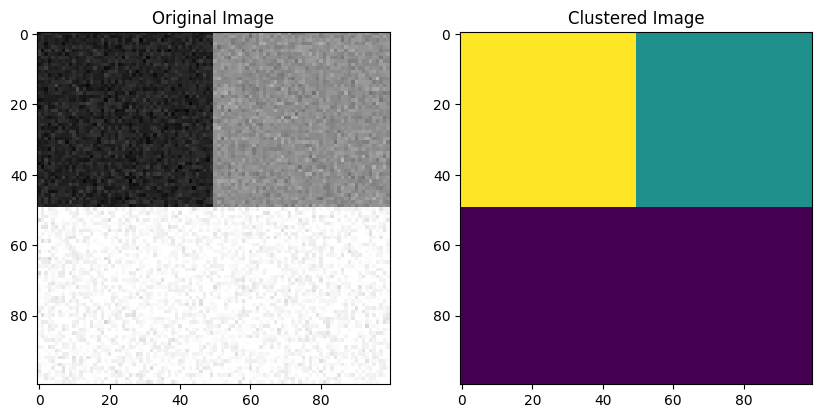

In [24]:
##testing
## i have looked in the internet to help me make the data for the testing and plotting
M=np.zeros((100,100))
M[0:50, 0:50] = np.random.normal(50, 10, (50, 50))
M[0:50, 50:100] = np.random.normal(150, 10, (50, 50))
M[50:100, :] = np.random.normal(250, 10, (50, 100))
M = np.clip(M, 0, 255)
k=3
table,hashtable,centroids = kmeans_matrix(M,k)

print("Table:")
print(table)
print("\nHashtable:")
print(hashtable)
print("\nCentroids:")
print(centroids)

plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plt.imshow(M,cmap='gray')
plt.title("Original Image")
plt.subplot(1,2,2)
plt.imshow(table,cmap='viridis')
plt.title("Clustered Image")
plt.show()


## Submission Guidelines
- Submit the completed `.ipynb` file.
- Clearly label all plots and outputs.
- Code readability and correctness matter.
- Partial credit will be given for logically correct implementations.

**Bonus**
- Compare convergence with and without standardization.
- Try different values of regularization strength.


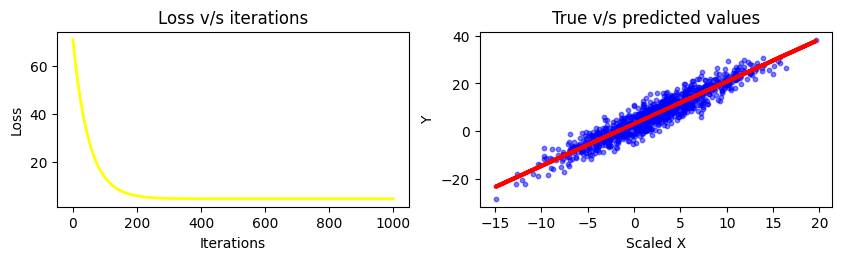

In [26]:
####sorry i did not have enought ime to complete the bonus part completeely...

##bonus part
##convergence with and without standardization
##linea rergression
X_1 = X.reshape(-1,1)
scaler = StandardScalerManual()
X_1final = scaler.fit_transform(X_1)

linear1 = LinearRegressionManual(lr=0.01,epochs=1000,l2_lambda=0.0)
linear1.fit(X_1final,Y)
prediction = linear.predict(X_1final)

plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.plot(linear1.losses,color='yellow',linewidth=2)
plt.title("Loss v/s iterations without lmabda")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(2,2,2)
plt.scatter(X,Y,color='blue',alpha=0.5,s=10)
plt.plot(X_1,prediction,color='red',linewidth=3)
plt.title("True v/s predicted values without lambda")
plt.xlabel("Scaled X")
plt.ylabel("Y")

plt.subplot(2,2,3)
plt.plot(linear.losses,color='yellow',linewidth=2)
plt.title("Loss v/s iterations with lmabda")
plt.xlabel("Iterations")
plt.ylabel("Loss")

plt.subplot(2,2,4)
plt.scatter(X,Y,color='blue',alpha=0.5,s=10)
plt.plot(X_,prediction,color='red',linewidth=3)
plt.title("True v/s predicted values with lambda")
plt.xlabel("Scaled X")
plt.ylabel("Y")
plt.show()